<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Código del capítulo 5: Optimización (Algoritmos genéticos)

### Uso de la librería DEAP

Import DEAP library

In [ ]:
!pip install deap
from deap import creator, base, tools, algorithms


Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

Cambiar de directorio de trabajo para cargar los datos:

In [ ]:
cd /content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/

/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb


In [ ]:
pwd

'/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb'

In [ ]:
import os
dataset_path = os.getcwd() + "/data/"
print(dataset_path)

/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/data/


Código onemax

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 17:44:15 2015

@author: samir
"""

# DEAP OneMax example

import random

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, 
                 toolbox.attr_bool, n=50)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),      # COMMA HERE!!! - MUST BE A TUPLE
    
toolbox.register('evaluate', evalOneMax)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.05)
toolbox.register('select', tools.selTournament, tournsize=3)

population = toolbox.population(100)

NGEN = 40

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits      = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))
    
    # Print the best individual on each iteration with its objective value
    top = tools.selBest(population, k=1)
    print(gen, evalOneMax(top[0]), top[0])
    

0 (35,) [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
1 (36,) [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1]
2 (38,) [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0]
3 (39,) [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]
4 (41,) [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]
5 (42,) [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
6 (43,) [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1

Código signal statistics

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


{'avg': 0.18227163809670696, 'std': 0.06116365573373014, 'min': 0.12475149677645965, 'max': 0.3591999261611327}
{'avg': 0.14264718895783082, 'std': 0.01955026621687856, 'min': 0.11194691380631303, 'max': 0.18665357953794293}
{'avg': 0.12757645083410996, 'std': 0.012630366770617426, 'min': 0.10587326511314246, 'max': 0.1596337619558488}
{'avg': 0.11333324892604076, 'std': 0.01290319571148202, 'min': 0.0882393812590776, 'max': 0.13761521891387352}
{'avg': 0.10534035410492923, 'std': 0.010347433059950699, 'min': 0.0882393812590776, 'max': 0.12496267267653484}
{'avg': 0.09941388629750957, 'std': 0.00978194328640627, 'min': 0.0882393812590776, 'max': 0.12008048598587226}
{'avg': 0.09314946060114873, 'std': 0.0060557882336124075, 'min': 0.0882393812590776, 'max': 0.10153683430878674}
{'avg': 0.08931442698803652, 'std': 0.004726135513255426, 'min': 0.08170940193685998, 'max': 0.10153683430878674}
{'avg': 0.08735102095718714, 'std': 0.003842150400922095, 'min': 0.08170940193685998, 'max': 0.09

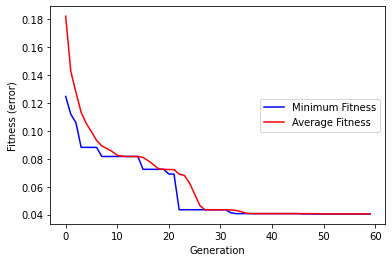

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 17:44:15 2015

@author: samir
"""

# Signal regression (cubic polynomy)

import random
from deap import creator, base, tools, algorithms

creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register('attrFloat', lambda: random.random()*2  - 1)  # Rands -1 to +1
toolbox.register('individual', tools.initRepeat, creator.Individual, 
                 toolbox.attrFloat, n=4)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)



# Define x and objective function
import numpy

# Values in x on which the signal is defined
xVal = numpy.array([x*6.0/200 - 3 for x in range(200)])

# Read the signal data
yVal = numpy.loadtxt(dataset_path + 'signal.data')

# Define the signal simulation function (generic 3rd grade 
# polynomial)
def polynomial(solution):
    a, b, c, d = solution
    return numpy.array([a*x**3 + b*x**2 + c*x + d for x in xVal])

#yVal = polynomial([-0.8, 0.7, 3.4, -1.6])

import math
from sklearn.metrics import mean_squared_error

def objective(solution):
    return math.sqrt(mean_squared_error(yVal, 
                polynomial(solution)))/(max(yVal) - min(yVal)) ,  # FINAL COMMA!

    
   
toolbox.register('evaluate', objective)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=0.5, indpb = 0.2)
toolbox.register('select', tools.selTournament, tournsize=3)


population = toolbox.population(40)

NGEN = 60

# Statistics
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register('avg', numpy.mean)
stats.register('std', numpy.std)
stats.register('min', numpy.min)
stats.register('max', numpy.max)

logbook = tools.Logbook()

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits      = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

    # Stats
    record = stats.compile(population)
    print(record)

    logbook.record(gen=gen, **record)
   

# Gather the data collected and plot it
generation = logbook.select('gen')
fitnessMin = logbook.select('min')
fitnessAvg = logbook.select('avg')

import matplotlib.pyplot as plt

line1 = plt.plot(generation, fitnessMin, "b-", label="Minimum Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness (error)")

line2 = plt.plot(generation, fitnessAvg, "r-", label="Average Fitness")

lns = line1 + line2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc="center right")

plt.show()

Código TSC

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  4 10:13:22 2015

@author: FonInf
"""

# Generate N cities (x,y)
import random, math

# In order to have the same problem on every run
random.seed(0)

def distance(cityA, cityB):
    return math.sqrt((cityA[0]-cityB[0])**2 + (cityA[1]-cityB[1])**2)

def generateCities(n):
    return [(random.randint(0,500), random.randint(0,500)) 
            for c in range(n)]
                
numCities = 30
cities    = generateCities(numCities)                
print(cities)

# Configure DEAP
from deap import algorithms, base, creator, tools
import numpy

toolbox = base.Toolbox()
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)    

toolbox.register('Indices', numpy.random.permutation, len(cities))
toolbox.register('Individual', tools.initIterate, creator.Individual,
                 toolbox.Indices)
toolbox.register('Population', tools.initRepeat, list, toolbox.Individual)                 

toolbox.register('mate', tools.cxOrdered)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.05)

# Total distance traversed by a given solution
def totalDistance(individual):
    return sum((distance(cities[individual[i]], cities[individual[i-1]])
                for i in range(len(individual)))),


# Execute the GA
toolbox.register('evaluate', totalDistance)
toolbox.register('select', tools.selTournament, tournsize=3)    

population = toolbox.Population(100)
NGEN = 100

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits      = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))        

    top = tools.selBest(population, k=1)    
    print(gen, totalDistance(top[0]), top[0])
    
print('='*40)
top10 = tools.selBest(population, k=10)
for ind in top10:
    print(totalDistance(ind), ind) 

[(432, 197), (388, 455), (215, 20), (132, 494), (261, 248), (207, 470), (401, 424), (155, 495), (244, 183), (298, 456), (464, 111), (258, 71), (144, 71), (386, 48), (316, 409), (128, 465), (272, 361), (414, 308), (461, 75), (158, 50), (373, 37), (460, 435), (350, 169), (241, 286), (51, 181), (222, 161), (312, 327), (467, 104), (494, 282), (244, 226)]
0 (6519.044065803991,) [0, 12, 24, 3, 19, 15, 7, 25, 13, 5, 29, 16, 14, 22, 28, 17, 20, 2, 10, 4, 11, 8, 21, 1, 9, 23, 18, 27, 6, 26]
1 (6274.6633244158975,) [9, 14, 3, 16, 2, 27, 1, 17, 8, 26, 4, 0, 20, 13, 5, 28, 10, 18, 21, 7, 6, 15, 11, 23, 29, 25, 12, 19, 24, 22]
2 (6037.279804591297,) [18, 10, 13, 29, 4, 6, 17, 8, 28, 15, 7, 1, 9, 14, 3, 16, 2, 20, 27, 26, 11, 19, 24, 12, 5, 0, 23, 22, 21, 25]
3 (5590.278856160775,) [28, 7, 5, 14, 3, 16, 2, 19, 24, 12, 25, 29, 15, 22, 13, 17, 20, 10, 4, 11, 8, 21, 1, 9, 23, 18, 27, 6, 26, 0]
4 (5458.984409640943,) [12, 24, 3, 15, 7, 5, 14, 28, 2, 19, 22, 25, 16, 29, 13, 17, 20, 10, 4, 11, 8, 21, 1, 9

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


16 (4156.0133491257275,) [9, 14, 6, 15, 7, 3, 5, 21, 23, 29, 24, 16, 8, 19, 12, 2, 20, 27, 26, 11, 25, 22, 13, 18, 10, 0, 4, 17, 28, 1]
17 (4156.0133491257275,) [9, 14, 6, 15, 7, 3, 5, 21, 23, 29, 24, 16, 8, 19, 12, 2, 20, 27, 26, 11, 25, 22, 13, 18, 10, 0, 4, 17, 28, 1]
18 (4067.1557304716803,) [3, 5, 21, 16, 8, 19, 12, 2, 20, 27, 26, 11, 24, 23, 22, 13, 18, 10, 0, 25, 29, 4, 17, 28, 1, 9, 14, 6, 15, 7]
19 (3954.0884470397227,) [15, 7, 3, 5, 21, 23, 29, 16, 25, 8, 19, 12, 2, 20, 13, 18, 10, 27, 26, 11, 24, 22, 0, 4, 17, 28, 1, 9, 14, 6]
20 (3933.87087148656,) [3, 5, 21, 23, 29, 24, 16, 8, 19, 12, 2, 20, 13, 18, 10, 27, 26, 11, 25, 22, 0, 4, 17, 28, 1, 9, 14, 6, 15, 7]
21 (3727.3462466467086,) [15, 7, 3, 5, 23, 16, 8, 19, 12, 2, 20, 13, 18, 10, 27, 11, 24, 26, 21, 22, 0, 25, 29, 4, 17, 28, 1, 9, 14, 6]
22 (3727.3462466467086,) [15, 7, 3, 5, 23, 16, 8, 19, 12, 2, 20, 13, 18, 10, 27, 11, 24, 26, 21, 22, 0, 25, 29, 4, 17, 28, 1, 9, 14, 6]
23 (3727.3462466467086,) [15, 7, 3, 5, 23, 16, 8, 

Código investments

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 12 09:19:11 2016

DEAP restriction example: decide optimal investments on commodities, where
their buying price increases with the number of units bought, thus 
decreasing the profit.

@author: samir
"""

# Problem data
buyPrices  = [100, 80, 90, 130, 105, 60, 80, 40, 140, 110]
sellPrices = [112, 95, 99, 140, 113, 77, 88, 53, 146, 121]
money      = 50000


# GA setup: a list with as many integer, positive attributes as 
# commodity types are there in the problem. Each number is the amount of
# units purchased of that commodity.
import random
from deap import creator, base, tools, algorithms

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

toolbox = base.Toolbox()

# Initially amounts purchased are 0..100, but on mutation they can be 0..200
# (so that initial population individuals are valid)
toolbox.register('attrInt', lambda: random.randint(0,100))
toolbox.register('individual', tools.initRepeat, creator.Individual, 
                 toolbox.attrInt, n=len(buyPrices))
                 
toolbox.register('population', tools.initRepeat, list, toolbox.individual)


# Objective function: compute total profit from amounts purchased.
# Remember the final comma (result must be a tuple)
def objective(solution):
    return sum([amt*(sp - bp*(1+amt/1000)) for amt, bp, sp in zip(solution, buyPrices, sellPrices)]), 

# Auxiliary function to compute the money spent on a given solution
def spent(solution):
    return sum([amt*bp*(1+amt/1000) for amt, bp in zip(solution, buyPrices)])


# Set up the GA elements
toolbox.register('evaluate', objective)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutUniformInt, low=0, up=200, indpb=0.1)
toolbox.register('select', tools.selTournament, tournsize=3)

# Create the population and run the GA
population = toolbox.population(100)
NGEN = 500

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits      = toolbox.map(toolbox.evaluate, offspring)
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
        
    population = toolbox.select(offspring, k=len(population))
    
    # Display info on each iteration
    top = tools.selBest(population, k=1)
    print(gen, 'profit=', objective(top[0]), 'spent=', spent(top[0]), 'investments=', top[0])


0 profit= (3639.174999999999,) spent= 50569.825 investments= [85, 82, 50, 17, 67, 95, 44, 60, 10, 51]
1 profit= (3639.174999999999,) spent= 50569.825 investments= [85, 82, 50, 17, 67, 95, 44, 60, 10, 51]
2 profit= (3726.439999999999,) spent= 46979.56 investments= [85, 82, 50, 17, 36, 95, 44, 60, 10, 51]
3 profit= (3726.439999999999,) spent= 46979.56 investments= [85, 82, 50, 17, 36, 95, 44, 60, 10, 51]
4 profit= (3944.725,) spent= 48879.274999999994 investments= [85, 82, 50, 17, 15, 95, 50, 118, 2, 68]
5 profit= (3990.0450000000005,) spent= 45480.954999999994 investments= [61, 75, 50, 17, 15, 95, 50, 118, 2, 68]
6 profit= (4000.27,) spent= 51196.729999999996 investments=

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


 [85, 82, 50, 17, 36, 95, 50, 118, 2, 68]
7 profit= (4025.5750000000007,) spent= 43388.424999999996 investments= [61, 75, 50, 17, 15, 95, 50, 118, 2, 51]
8 profit= (4056.525,) spent= 54438.475000000006 investments= [61, 79, 76, 37, 15, 95, 50, 118, 36, 54]
9 profit= (4056.685000000001,) spent= 48506.314999999995 investments= [61, 79, 50, 17, 39, 95, 50, 118, 2, 68]
10 profit= (4108.64,) spent= 47198.35999999999 investments= [61, 91, 50, 17, 36, 95, 50, 118, 2, 51]
11 profit= (4115.910000000001,) spent= 50908.09 investments= [61, 79, 50, 37, 36, 95, 50, 118, 2, 68]
12 profit= (4134.164999999999,) spent= 52926.835 investments= [61, 91, 50, 37, 15, 95, 50, 118, 36, 54]
13 profit= (4168.615,) spent= 50277.384999999995 investments= [61, 91, 50, 37, 39, 95, 50, 118, 2, 51]
14 profit= (4168.615,) spent= 50277.384999999995 investments= [61, 91, 50, 37, 39, 95, 50, 118, 2, 51]
15 profit= (4190.084999999999,) spent= 55582.915 investments= [61, 91, 50, 37, 39, 95, 50, 118, 36, 54]
16 profit= (419

Código investments constraints

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 12 09:19:11 2016

DEAP restriction example: decide optimal investments on commodities, where
their buying price increases with the number of units bought, thus 
decreasing the profit.

@author: samir
"""

# Problem data
buyPrices  = [100, 80, 90, 130, 105, 60, 80, 40, 140, 110]
sellPrices = [112, 95, 99, 140, 113, 77, 88, 53, 146, 121]
money      = 50000


# GA setup: a list with as many integer, positive attributes as 
# commodity types are there in the problem. Each number is the amount of
# units purchased of that commodity.
import random
from deap import creator, base, tools, algorithms

creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)

toolbox = base.Toolbox()

# Initially amounts purchased are 0..100, but on mutation they can be 0..200
# (so that initial population individuals are valid)
toolbox.register('attrInt', lambda: random.randint(0,200))
toolbox.register('individual', tools.initRepeat, creator.Individual, 
                 toolbox.attrInt, n=len(buyPrices))
                 
toolbox.register('population', tools.initRepeat, list, toolbox.individual)


# Objective function: compute total profit from amounts purchased.
# Remember the final comma (result must be a tuple)
def objective(solution):
    return sum([amt*(sp - bp*(1+amt/1000)) for amt, bp, sp in zip(solution, buyPrices, sellPrices)]), 

# Auxiliary function to compute the money spent on a given solution
def spent(solution):
    return sum([amt*bp*(1+amt/1000) for amt, bp in zip(solution, buyPrices)]) 


# Decorator function required to enforce individuals to limit the money spent.
# It removes 1 unit purchased (randomly) until the budget constraint is fulfilled
def enforceBudget(budget):
    def decorator(func):
        def wrapper(*args, **kargs):
            offspring = func(*args, **kargs)
            for child in offspring:
                while spent(child) > budget:
                    pos = random.randint(0, len(child)-1)
                    # It is critical to avoid negative attributes
                    child[pos] = max(child[pos]-1, 0)
            return offspring
        return wrapper
    return decorator


# Set up the GA elements
toolbox.register('evaluate', objective)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutUniformInt, low=0, up=200, indpb=0.1)
toolbox.register('select', tools.selTournament, tournsize=3)

# Tell DEAP to check budget on the initial population and after mutations and crossovers
toolbox.decorate('population', enforceBudget(money))
toolbox.decorate('mate',   enforceBudget(money))
toolbox.decorate('mutate', enforceBudget(money))

# Create the population and run the GA
population = toolbox.population(100)
NGEN = 100

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits      = toolbox.map(toolbox.evaluate, offspring)
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
        
    population = toolbox.select(offspring, k=len(population))
    
    # Display info on each iteration
    top = tools.selBest(population, k=1)
    print(gen, 'profit=', objective(top[0]), 'spent=', spent(top[0]), 'investments=', top[0])


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


0 profit= (3499.6650000000027,) spent= 49998.33500000001 investments= [81, 55, 0, 62, 33, 102, 3, 111, 47, 49]
1 profit= (3499.6650000000027,) spent= 49998.33500000001 investments= [81, 55, 0, 62, 33, 102, 3, 111, 47, 49]
2 profit= (3499.6650000000027,) spent= 49998.33500000001 investments= [81, 55, 0, 62, 33, 102, 3, 111, 47, 49]
3 profit= (3798.245000000002,) spent= 43709.755000000005 investments= [15, 75, 57, 51, 29, 83, 52, 113, 0, 47]
4 profit= (3864.6450000000027,) spent= 49135.355 investments= [81, 55, 57, 51, 29, 83, 52, 113, 0, 47]
5 profit= (3864.6450000000027,) spent= 49135.355 investments= [81, 55, 57, 51, 29, 83, 52, 113, 0, 47]
6 profit= (3933.274999999998,) spent= 49910.725 investments= [56, 128, 42, 36, 37, 81, 50, 110, 0, 46]
7 profit= (4000.8050000000007,) spent= 49901.195 investments= [73, 93, 51, 57, 27, 95, 42, 105, 0, 35]
8 profit= (3993.765000000001,) spent= 49666.235 investments= [73, 93, 51, 57, 27, 95, 42, 105, 0, 33]
9 profit= (4034.5049999999997,) spent= 488